# Calgary Rainfall Study - Personal Project
Author: Gustavo Bravo
Dataset: Historical Rainfall - data.calgary.ca - https://data.calgary.ca/Environment/Historical-Rainfall/d9kv-swk3
Data use license: https://data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa

Have the weather patterns changed throughout the years in the city of Calgary? How has temperature been changing? If so, how have these affected floods, forest fire rates, and other natural disasters?

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("Historical_Rainfall.csv")
plt.style.use("seaborn-dark")

First, to get a feel for how it rains differently in each part of the city, I want to analyze the last 5 years of rain per location

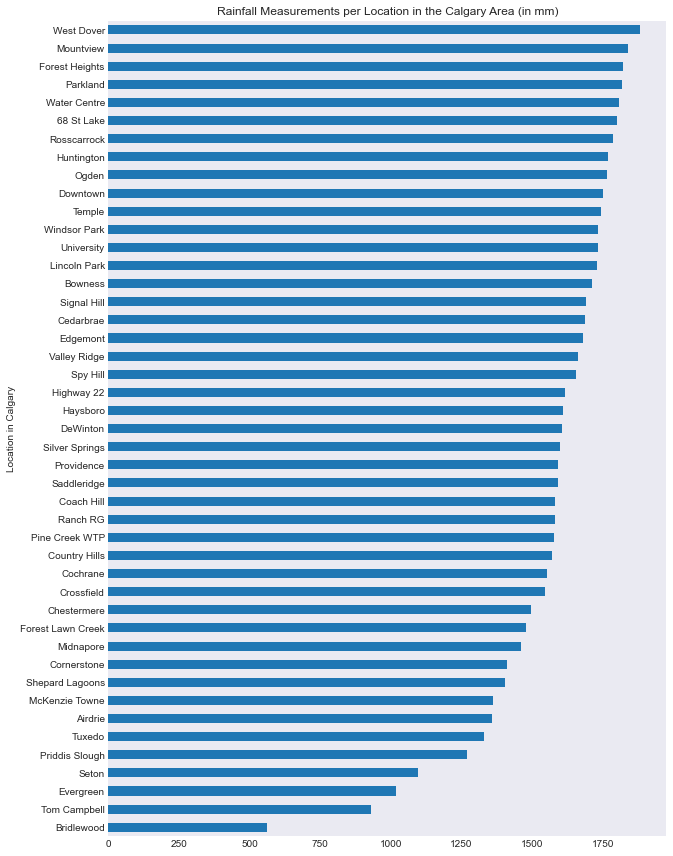

<Figure size 432x288 with 0 Axes>

In [41]:
# Rainfaill 2016-2021
last_five_years_df = df[(df["YEAR"] >= 2016) & (df["YEAR"] < 2022)]

# By location in calgary
plt.figure(figsize = (10,15))
last_five_years_df.groupby("NAME")["RAINFALL"].sum().sort_values().plot(
    kind = "barh",
    title = "Rainfall Measurements per Location in the Calgary Area (in mm)",
    xlabel = "Location in Calgary"
)
plt.show()
plt.clf()

Looks like there are certainly parts of the city that get more rain than others, I want to look at these based on their quadrant of the city (NW, SE, etc.)

In [42]:
# Create a dictionary containing the location as values and its ordinal directions as keys
ordinal_calgary_dict = {
    "NW": [""],
    "SW": [""],
    "SE": [""],
    "NE": [""]
}

# add quadrant column to dataframe